In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [53]:
nltk.download(['stopwords', 'punkt'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df = pd.read_csv('sample_data/clickbait_data.csv', sep=";")
df.head()

,"headline,clickbait",Unnamed: 1
0,"Should I Get Bings,1",NaN
1,"Which TV Female Friend Group Do You Belong In,1",NaN
2,"The New ""Star Wars: The Force Awakens"" Trailer...",NaN
3,"This Vine Of New York On ""Celebrity Big Brothe...",NaN
4,A Couple Did A Stunning Photo Shoot With Their...,NaN


In [57]:
headline = [i[0: len(i)-2] for i in df["headline,clickbait"].values]
label1 = [i[-1] for i in df["headline,clickbait"].values]

In [6]:
Xlatih, Xtest, ylatih, ytest = train_test_split(headline, label, test_size=0.2)

In [21]:
stop_words = set(stopwords.words("english"))
judul_latih, judul_test = [],[]
data = [judul_latih, judul_test]
for i,j in enumerate([Xlatih, Xtest]):
  for x in range(len(j)):
    kata = ""
    word_token = word_tokenize(j[x])
    for w in word_token:
      if w.casefold() not in stop_words:
        kata += w.casefold()+" "
    data[i].append(kata.strip())

In [22]:
judul_latih[1]

'bronzers blushes actually look amazing women color'

In [23]:
tk = Tokenizer(num_words=5000, oov_token='<OOV>')
tk.fit_on_texts(judul_latih)


sekuens_latih = tk.texts_to_sequences(judul_latih)
sekuens_test = tk.texts_to_sequences(judul_test)

pad_latih = pad_sequences(sekuens_latih,maxlen=20,padding='post',truncating='post')
pad_test = pad_sequences(sekuens_test,maxlen=20,padding='post',truncating='post')




In [28]:
pad_latih[1]

array([  1,   1,  17,  92, 294,  48, 413,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 16, input_length=20),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
class Mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print('\nAkurasi telah mencapai > 80%')
      self.model.stop_training = True
callbacks = Mycallback()

In [27]:
hist = model.fit(pad_latih, ylatih, 
                    epochs=30, validation_data=(pad_test, ytest), 
                    verbose=2, callbacks=[callbacks])

ValueError: ignored

In [ ]:
model.evaluate(pad_test, label_test)

200/200 [==============================] - 1s 6ms/step - loss: 0.0712 - accuracy: 0.9753


[0.07116158306598663, 0.9753124713897705]

<function matplotlib.pyplot.show(*args, **kw)>

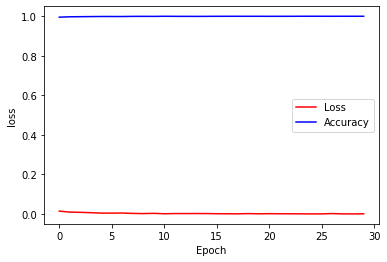

In [ ]:
plt.plot(hist.history['loss'], color='red')
plt.plot(hist.history['accuracy'], color='blue')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(["Loss", 'Accuracy'])
plt.show

In [ ]:
# Nama : Mario Valerian Rante Ta'dung (riooorante)
# E-mail : rantetadungrio@gmail.com
